# Live Demo

Showcases the IR project's current abilities.

# Import of current modules

- IRFileHandler: Handles the raw measurement files
- Analysis: Does all the data processing

In [1]:
import modules.ir_file_handler as ir
import modules.analysis as analysis

- The paths to both data and measurement files are specified.
- A few settings for the data import can be tweaked here by the user.
- Data is directly imported into the datamodel

In [2]:
path_to_measurement = "D:/Downloads/IR_sample_data/"
datamodel_directory = "D:/Github/IRAnalysis/"
MeasurementFiles = ir.IRDataFiles(
    path_to_measurement,
    datamodel_directory=datamodel_directory,
    extension="csv",
    experiment_name="NamedExperiment",
)

Checking to see which files have been loaded successfully.

In [3]:
MeasurementFiles.files

['TO.P123.5_5h-450C.CSV',
 'TO_P123_5_360min-450C_30min-4mbar-Pyr-RT_30min-300C-Pyr-des.CSV',
 'TO_P123_5_360min-450C_30min-4mbar-Pyr-RT_30min-350C-Pyr-des.CSV',
 'TO_P123_5_360min-450C_30min-4mbar-Pyr-RT_30min-400C-Pyr-des.CSV',
 'TO_P123_5_360min-450C_30min-4mbar-Pyr-RT_30min-450C-Pyr-des.CSV',
 'TO_P123_5_360min-450C_30min-4mbar-Pyr-RT_60min-150C-Pyr-des.CSV',
 'TO_P123_5_360min-450C_30min-4mbar-Pyr-RT_60min-200C-Pyr-des.CSV',
 'TO_P123_5_360min-450C_30min-4mbar-Pyr-RT_60min-250C-Pyr-des.CSV']

The files which holds the background data is specified by the user.

In [4]:
MeasurementFiles.set_background(["TO.P123.5_5h-450C.CSV"])

IRAnalysis(id='iranalysis0', datetime_created=datetime.datetime(2024, 3, 4, 18, 2, 47, 288335), datetime_modified=None, contributors=[], experiment=[Experiment(id='experiment0', name='NamedExperiment', sample_preparation=None, measurements=[Measurement(id='measurement0', name='TO.P123.5_5h-450C.CSV', geometry=None, temperature=None, pressure=None, measurement_type='Background', measurement_data=Dataset(id='dataset2', timestamp=None, x_axis=Series(id='series3', data_array=[799.8316, 800.3137, 800.7958, 801.278, 801.7601, 802.2422, 802.7243, 803.2064, 803.6885, 804.1707, 804.6528, 805.1349, 805.617, 806.0991, 806.5812, 807.0634, 807.5455, 808.0276, 808.5097, 808.9918, 809.4739, 809.9561, 810.4382, 810.9203, 811.4024, 811.8845, 812.3666, 812.8488, 813.3309, 813.813, 814.2951, 814.7772, 815.2593, 815.7415, 816.2236, 816.7057, 817.1878, 817.6699, 818.152, 818.6342, 819.1163, 819.5984, 820.0805, 820.5626, 821.0447, 821.5269, 822.009, 822.4911, 822.9732, 823.4553, 823.9374, 824.4196, 824.9017

Checking the raw data before analyzing

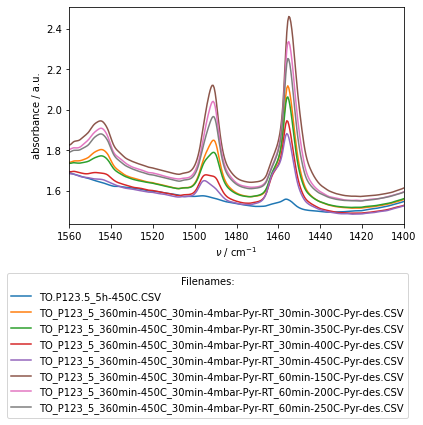

In [5]:
MeasurementFiles.show_raw_data(wavenumber_region=(1560, 1400), legend=True)

Current data within the datamodel

In [6]:
print(MeasurementFiles.datamodel)

IRAnalysis
├── id = iranalysis0
├── datetime_created = 2024-03-04 18:02:47.288335
└── experiment
    └── 0
        └── Experiment
            ├── id = experiment0
            ├── name = NamedExperiment
            └── measurements
                ├── 0
                │   └── Measurement
                │       ├── id = measurement0
                │       ├── name = TO.P123.5_5h-450C.CSV
                │       ├── measurement_type = Background
                │       └── measurement_data
                │           └── Dataset
                │               ├── id = dataset2
                │               ├── x_axis
                │               │   └── Series
                │               │       ├── id = series3
                │               │       ├── data_array = [799.8316, 800.3137, 800.7958, 801.278, 801.7601, ...]
                │               │       └── unit = 1 / cm
                │               └── y_axis
                │                   └── Series
        

## Analyzing the measured data


In [7]:
Analysis = analysis.IRAnalysis(MeasurementFiles)

Plot of the background and baseline corrected data

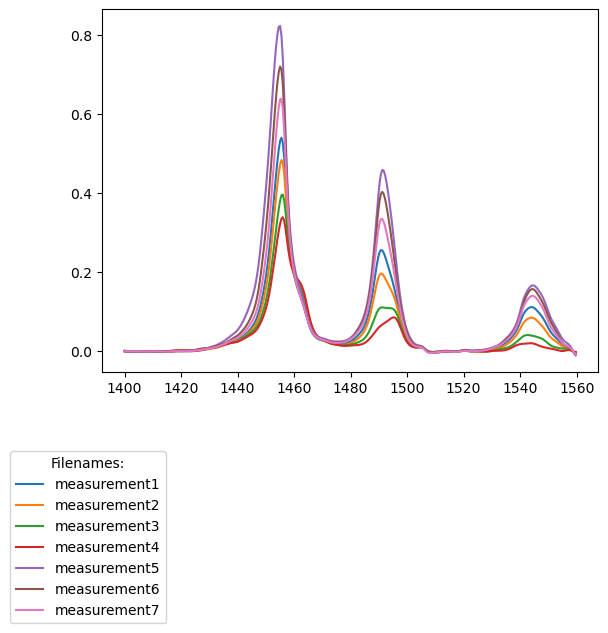

In [8]:
Analysis.plot()

In [9]:
print(Analysis.datamodel)

IRAnalysis
├── id = iranalysis0
├── datetime_created = 2024-03-04 18:02:47.288335
└── experiment
    └── 0
        └── Experiment
            ├── id = experiment0
            ├── name = NamedExperiment
            ├── measurements
            │   ├── 0
            │   │   └── Measurement
            │   │       ├── id = measurement0
            │   │       ├── name = TO.P123.5_5h-450C.CSV
            │   │       ├── measurement_type = Background
            │   │       └── measurement_data
            │   │           └── Dataset
            │   │               ├── id = dataset2
            │   │               ├── x_axis
            │   │               │   └── Series
            │   │               │       ├── id = series3
            │   │               │       ├── data_array = [799.8316, 800.3137, 800.7958, 801.278, 801.7601, ...]
            │   │               │       └── unit = 1 / cm
            │   │               └── y_axis
            │   │                   └── Series
        

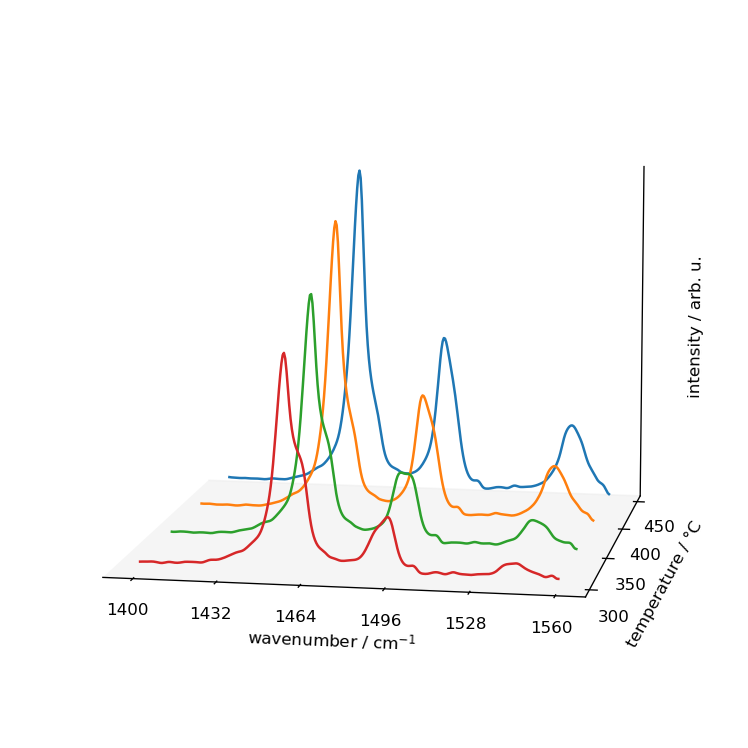

In [13]:
Analysis.plane_plot(yticks=[450, 400, 350, 300])